# Level 3

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("C:/Git Projects/Restaurant Analysis/Dataset .csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

## Task 1: Restaurant Reviews

#### Analyze the text reviews to identify the most common positive and negative keywords.
#### Calculate the average length of reviews and explore if there is a relationship between review length and rating.

Most common positive keywords: {'excellent': 301, 'good': 3179}
Most common negative keywords: {'poor': 186}
Average review length: 1.3378703800649148


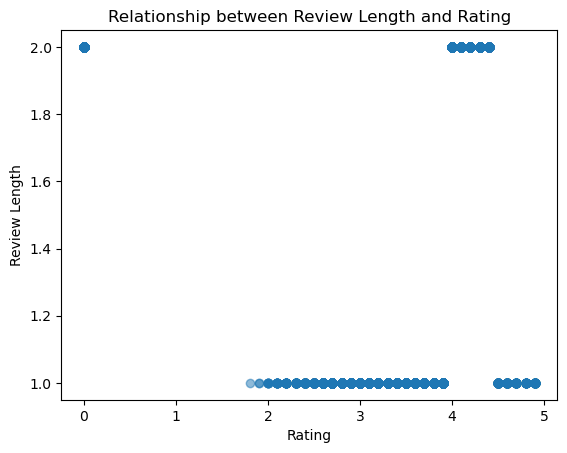

In [18]:
#Task 1
from collections import Counter
import re
# Ensure the required columns exist
if 'rating text' in df.columns and 'aggregate rating' in df.columns:
    
    # Step 1: Preprocess the reviews
    def preprocess_review(review):
        # Convert to lowercase
        review = review.lower()
        # Remove non-alphabetic characters
        review = re.sub(r'[^a-z\s]', '', review)
        # Tokenize by splitting
        words = review.split()
        return words
    
    df['Processed Reviews'] = df['rating text'].apply(preprocess_review)
    
    # Step 2: Identify the most common positive and negative keywords
    all_words = [word for review in df['Processed Reviews'] for word in review]
    word_freq = Counter(all_words)
    
    # For simplicity, let's assume we have predefined lists of positive and negative words
    positive_words = set(['good', 'great', 'excellent', 'amazing', 'nice', 'love', 'best', 'awesome'])
    negative_words = set(['bad', 'terrible', 'awful', 'poor', 'worst', 'hate', 'disappointing', 'horrible'])
    
    positive_counts = {word: freq for word, freq in word_freq.items() if word in positive_words}
    negative_counts = {word: freq for word, freq in word_freq.items() if word in negative_words}
    
    # Print the most common positive and negative keywords
    print("Most common positive keywords:", positive_counts)
    print("Most common negative keywords:", negative_counts)
    
    # Step 3: Calculate the average length of reviews
    df['Review Length'] = df['Processed Reviews'].apply(len)
    average_review_length = df['Review Length'].mean()
    print("Average review length:", average_review_length)
    
    # Step 4: Explore the relationship between review length and rating
    plt.scatter(df['aggregate rating'], df['Review Length'], alpha=0.5)
    plt.title('Relationship between Review Length and Rating')
    plt.xlabel('Rating')
    plt.ylabel('Review Length')
    plt.show()
else:
    print("Required columns ('Reviews' and 'Aggregate rating') not found in the dataset.")


## Task 2: Votes Analysis

#### Identify the restaurants with the highest and lowest number of votes.
#### Analyze if there is a correlation between the number of votes and the rating of a restaurant.

Restaurant with the highest number of votes:
Restaurant Name      Toit
Votes               10934
Aggregate rating      4.8
Name: 728, dtype: object

Restaurant with the lowest number of votes:
Restaurant Name     Cantinho da Gula
Votes                              0
Aggregate rating                 0.0
Name: 69, dtype: object

Correlation between the number of votes and the rating: 0.31


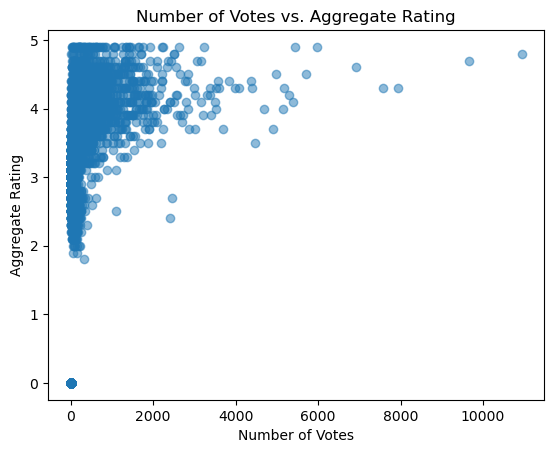

In [8]:
if 'Votes' in df.columns and 'Aggregate rating' in df.columns and 'Restaurant Name' in df.columns:
    # Identify the restaurant with the highest and lowest number of votes
    restaurant_with_most_votes = df.loc[df['Votes'].idxmax()]
    restaurant_with_least_votes = df.loc[df['Votes'].idxmin()]
    
    print("Restaurant with the highest number of votes:")
    print(restaurant_with_most_votes[['Restaurant Name', 'Votes', 'Aggregate rating']])
    print("\nRestaurant with the lowest number of votes:")
    print(restaurant_with_least_votes[['Restaurant Name', 'Votes', 'Aggregate rating']])

    # Analyze the correlation between the number of votes and the rating
    correlation = df[['Votes', 'Aggregate rating']].corr().iloc[0, 1]
    print(f"\nCorrelation between the number of votes and the rating: {correlation:.2f}")

    # Plot the relationship between the number of votes and the rating
    plt.scatter(df['Votes'], df['Aggregate rating'], alpha=0.5)
    plt.xlabel('Number of Votes')
    plt.ylabel('Aggregate Rating')
    plt.title('Number of Votes vs. Aggregate Rating')
    plt.show()
else:
    print("Required columns ('Votes', 'Aggregate rating', and 'Restaurant Name') not found in the dataset.")


## Task 3: Price Range vs. Online Delivery and Table Booking

#### Analyze if there is a relationship between the price range and the availability of online delivery and table booking.
#### Determine if higher-priced restaurants are more likely to offer these services.


             Online Delivery  Table Booking
Price range                                
1                  15.774077       0.022502
2                  41.310633       7.677482
3                  29.190341      45.738636
4                   9.044369      46.757679


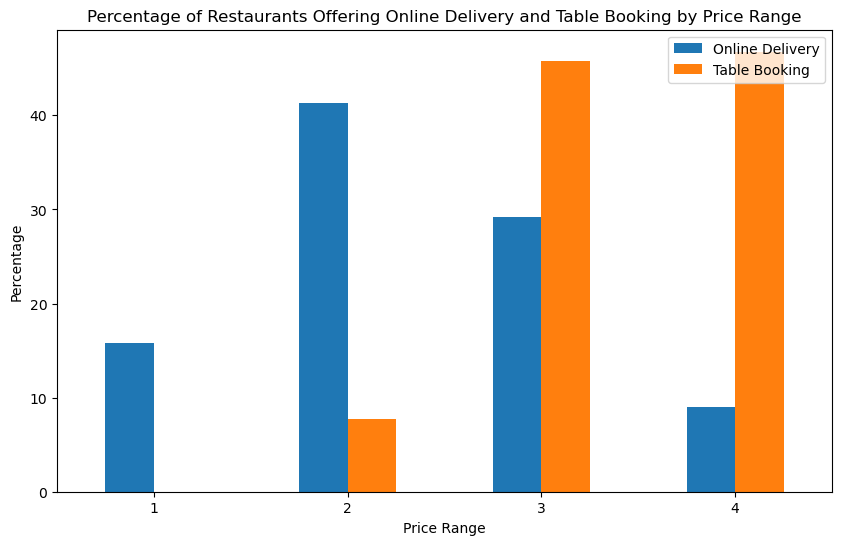

In [9]:
# Ensure the required columns exist
required_columns = ['Price range', 'Has Online delivery', 'Has Table booking']
if all(column in df.columns for column in required_columns):
    
    # Step 1: Convert the 'Has Online delivery' and 'Has Table booking' columns to binary values
    df['Has Online delivery'] = df['Has Online delivery'].apply(lambda x: 1 if x == 'Yes' else 0)
    df['Has Table booking'] = df['Has Table booking'].apply(lambda x: 1 if x == 'Yes' else 0)
    
    # Step 2: Group by price range and calculate the percentage of restaurants that offer online delivery and table booking
    price_ranges = df.groupby('Price range')
    
    # Calculate the percentage of restaurants offering online delivery in each price range
    online_delivery_percentage = price_ranges['Has Online delivery'].mean() * 100
    
    # Calculate the percentage of restaurants offering table booking in each price range
    table_booking_percentage = price_ranges['Has Table booking'].mean() * 100
    
    # Combine the results into a DataFrame
    results = pd.DataFrame({
        'Online Delivery': online_delivery_percentage,
        'Table Booking': table_booking_percentage
    })
    
    # Print the results
    print(results)
    
    # Step 3: Visualize the results using bar charts
    results.plot(kind='bar', figsize=(10, 6))
    plt.title('Percentage of Restaurants Offering Online Delivery and Table Booking by Price Range')
    plt.xlabel('Price Range')
    plt.ylabel('Percentage')
    plt.xticks(rotation=0)
    plt.legend(loc='upper right')
    plt.show()

else:
    print("Required columns ('Price range', 'Has Online delivery', 'Has Table booking') not found in the dataset.")


###### Result :- Here we can see as the price range is increasing the facility of table booking is also increasing